In python, all variables are references-- that is a variable name means a computer address.

In [67]:
a=255 #creates an 'integer 1, puts it in memory at a location, and makes a table that asociates "a" with that location
print(a)
print(a.bit_length())
for a in range(0,514):
    print(a.to_bytes(2,'big').hex())
dir(a)
print(sys.byteorder)

255
8
0000
0001
0002
0003
0004
0005
0006
0007
0008
0009
000a
000b
000c
000d
000e
000f
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
001a
001b
001c
001d
001e
001f
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
002a
002b
002c
002d
002e
002f
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
003a
003b
003c
003d
003e
003f
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
004a
004b
004c
004d
004e
004f
0050
0051
0052
0053
0054
0055
0056
0057
0058
0059
005a
005b
005c
005d
005e
005f
0060
0061
0062
0063
0064
0065
0066
0067
0068
0069
006a
006b
006c
006d
006e
006f
0070
0071
0072
0073
0074
0075
0076
0077
0078
0079
007a
007b
007c
007d
007e
007f
0080
0081
0082
0083
0084
0085
0086
0087
0088
0089
008a
008b
008c
008d
008e
008f
0090
0091
0092
0093
0094
0095
0096
0097
0098
0099
009a
009b
009c
009d
009e
009f
00a0
00a1
00a2
00a3
00a4
00a5
00a6
00a7
00a8
00a9
00aa
00ab
00ac
00ad
00ae
00af
00b0
00b1
00b2
00b3
00b4
00b5
00b6
00b7
00b8
00b9
00ba
00bb
00bc
00bd
00be
00bf
00c0
00c1
00c2
00c3
00c4
00c5
00c6

What is "a"?  It is an "integer".  In python this means that there is a block of computer memory set aside that contain data.  In addition there are a set of operations-- things like "__ceil__" for instance that operate on it.  A "type", or equivalently a "class" in a computer contains a set of bits(1/0) that contain information and a set of "methods" (rules) for how to use it and understand it.  

To find out what __ceil__ does:


In [50]:
help(a.__floor__)
print(a.__ceil__())
print(a.__add__(4))
print(a.__sub__(6))
x=-6.4
import math
print(math.ceil(x))

Help on built-in function __floor__:

__floor__(...) method of builtins.int instance
    Flooring an Integral returns itself.

10000
10004
9994
-6


In python, integers don't have fixed length and you can precisely represent any integer.  (This isn't true when we start to use numpy or scipy, or a numer of other libraries, which have integer representations that reflect the representation in the machine language of the computer on which they are running). 



In [51]:
import sys
dir(sys)

['__displayhook__',
 '__doc__',
 '__excepthook__',
 '__interactivehook__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__stderr__',
 '__stdin__',
 '__stdout__',
 '_clear_type_cache',
 '_current_frames',
 '_debugmallocstats',
 '_getframe',
 '_git',
 '_home',
 '_xoptions',
 'abiflags',
 'api_version',
 'argv',
 'base_exec_prefix',
 'base_prefix',
 'builtin_module_names',
 'byteorder',
 'call_tracing',
 'callstats',
 'copyright',
 'displayhook',
 'dont_write_bytecode',
 'exc_info',
 'excepthook',
 'exec_prefix',
 'executable',
 'exit',
 'flags',
 'float_info',
 'float_repr_style',
 'get_asyncgen_hooks',
 'get_coroutine_wrapper',
 'getallocatedblocks',
 'getcheckinterval',
 'getdefaultencoding',
 'getdlopenflags',
 'getfilesystemencodeerrors',
 'getfilesystemencoding',
 'getprofile',
 'getrecursionlimit',
 'getrefcount',
 'getsizeof',
 'getswitchinterval',
 'gettrace',
 'hash_info',
 'hexversion',
 'implementation',
 'int_info',
 'intern',
 'is_finalizing',
 'last_traceback'

In [52]:
print(sys.maxsize)  #the largest integer that can be represented on this machine
print(sys.maxsize.to_bytes(8,'little'))  #in hex

9223372036854775807
b'\xff\xff\xff\xff\xff\xff\xff\x7f'


Negative integers are represented using "two's complement" - ie the most significant bit is a sign bit, but 1000000000... is the largest magnitude negative number, rather than -1.  The reason for this is that there is no difference between the actual operations that happen on negative integers and on unsigned integers--- it is just a matter of interpreting the result.  


In [53]:
a=-1
print(a)
print(a.to_bytes(8,'little',signed=True))
a=-2
print(a)
print(a.to_bytes(8,'little',signed=True))
b=2**64-2
print(b)
print(b.to_bytes(8,'little'))
c=2+b
print('c =',c)
print(c.to_bytes(9,'little'))  #need to change to 9 bytes because Python doesn't limit the number to 64 bits

-1
b'\xff\xff\xff\xff\xff\xff\xff\xff'
-2
b'\xfe\xff\xff\xff\xff\xff\xff\xff'
18446744073709551614
b'\xfe\xff\xff\xff\xff\xff\xff\xff'
c = 18446744073709551616
b'\x00\x00\x00\x00\x00\x00\x00\x00\x01'


Notice that 2+-2=0 and that b+2=0  (if we ignore the overflow bit, which is easy to do inside a CPU)
# Floating Point Numbers

Floating point numbers are represented differently:  there is an exponent and a mantissa.  



In [54]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Thus with 64 bits (53 in the mantissa, 11 in the exponent) we can represent numbers from min to max.  
The internal FP representation in python is done the same way.  
Notice that unsigned integers, signed integers and floating point numbers are indistinguishable at the "bit/byte" level.  The "type" of the data is what distinguishes them and differentiates how the bits are interpreted.

"epsilon" is the smallest fractional change in the mantissa we can see.  

This hearkens back to the slide rule- where the best you would do is 3 significant figures- and which was the computer which was used in the Manhattan Project!  Here we have 16 significant figures- always good enough for Physics; although it occasionally does have a big impact on how to calculate things.

In [68]:
f=100.0
print(f.hex())
dir(f)

0x1.9000000000000p+6


['__abs__',
 '__add__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getformat__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setformat__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 'as_integer_ratio',
 'conjugate',
 'fromhex',
 'hex',
 'imag',
 'is_integer',
 'real']

In [1]:
import numpy as np   # we use numpy for numerical calculations
f=100000000*np.pi
print(f)
print(f.hex())
i=f.__round__()
print(i)
print(i.to_bytes(8,'big').hex())


314159265.3589793
0x1.2b9b0a15be611p+28
314159265
0000000012b9b0a1


Notice that while there are similarities between the integer and floating point representations, the bit patterns are 
completely different. 

In fact- this realization- that you can interpret the same bit patterns in multiple ways-- as numbers, as machine language instructions, as letters/words/ floating point numbers, - or as completely arbitrary objects lies at the heart of computing. 

The word "type" refers to the fact that there is a well defined rule to interpret a bit pattern a particular way. 

In python, all variables are "references" (ie. there is a dictionary of memory locations, and the name of the variable is used to look up the memory location) to "PyObjects".  PyObjects have all the rules of how to interpret themselves and how they work with other PyObjects. 




# Arrays and Numpy (Numerical Python)
A rich set of objects are the Numpy arrays.  We will use them extensively.  

Note:  Arrays should not be confused with Matrices- those are completely different entities (the linear algebra rules for multiplying and inverting matrices DO NOT apply to arrays!.  You should rather think of arrays as tables- or pages in an Excel spreadsheet.  

The big difference between spreadsheets and Python is that "formulas" are in the python script, and are used to operate on all the data that are in one array to get the results in a different array.

Python likes you to do things with arrays rather than with loops.  So for fun, we calculate the squares, square roots and calculate 2x+1 for all the integers from 1 to 100:

In [2]:
numbers=np.linspace(1,100,100)
numbers

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.])

In [3]:
squares=numbers**2
squares

array([  1.00000000e+00,   4.00000000e+00,   9.00000000e+00,
         1.60000000e+01,   2.50000000e+01,   3.60000000e+01,
         4.90000000e+01,   6.40000000e+01,   8.10000000e+01,
         1.00000000e+02,   1.21000000e+02,   1.44000000e+02,
         1.69000000e+02,   1.96000000e+02,   2.25000000e+02,
         2.56000000e+02,   2.89000000e+02,   3.24000000e+02,
         3.61000000e+02,   4.00000000e+02,   4.41000000e+02,
         4.84000000e+02,   5.29000000e+02,   5.76000000e+02,
         6.25000000e+02,   6.76000000e+02,   7.29000000e+02,
         7.84000000e+02,   8.41000000e+02,   9.00000000e+02,
         9.61000000e+02,   1.02400000e+03,   1.08900000e+03,
         1.15600000e+03,   1.22500000e+03,   1.29600000e+03,
         1.36900000e+03,   1.44400000e+03,   1.52100000e+03,
         1.60000000e+03,   1.68100000e+03,   1.76400000e+03,
         1.84900000e+03,   1.93600000e+03,   2.02500000e+03,
         2.11600000e+03,   2.20900000e+03,   2.30400000e+03,
         2.40100000e+03,

In [4]:
squareRoots=np.sqrt(numbers)  #  note that the sqrt function is part of the numpy package
squareRoots

array([  1.        ,   1.41421356,   1.73205081,   2.        ,
         2.23606798,   2.44948974,   2.64575131,   2.82842712,
         3.        ,   3.16227766,   3.31662479,   3.46410162,
         3.60555128,   3.74165739,   3.87298335,   4.        ,
         4.12310563,   4.24264069,   4.35889894,   4.47213595,
         4.58257569,   4.69041576,   4.79583152,   4.89897949,
         5.        ,   5.09901951,   5.19615242,   5.29150262,
         5.38516481,   5.47722558,   5.56776436,   5.65685425,
         5.74456265,   5.83095189,   5.91607978,   6.        ,
         6.08276253,   6.164414  ,   6.244998  ,   6.32455532,
         6.40312424,   6.4807407 ,   6.55743852,   6.63324958,
         6.70820393,   6.78232998,   6.8556546 ,   6.92820323,
         7.        ,   7.07106781,   7.14142843,   7.21110255,
         7.28010989,   7.34846923,   7.41619849,   7.48331477,
         7.54983444,   7.61577311,   7.68114575,   7.74596669,
         7.81024968,   7.87400787,   7.93725393,   8.  

In [5]:
doublePlusOne=2*numbers+1
doublePlusOne

array([   3.,    5.,    7.,    9.,   11.,   13.,   15.,   17.,   19.,
         21.,   23.,   25.,   27.,   29.,   31.,   33.,   35.,   37.,
         39.,   41.,   43.,   45.,   47.,   49.,   51.,   53.,   55.,
         57.,   59.,   61.,   63.,   65.,   67.,   69.,   71.,   73.,
         75.,   77.,   79.,   81.,   83.,   85.,   87.,   89.,   91.,
         93.,   95.,   97.,   99.,  101.,  103.,  105.,  107.,  109.,
        111.,  113.,  115.,  117.,  119.,  121.,  123.,  125.,  127.,
        129.,  131.,  133.,  135.,  137.,  139.,  141.,  143.,  145.,
        147.,  149.,  151.,  153.,  155.,  157.,  159.,  161.,  163.,
        165.,  167.,  169.,  171.,  173.,  175.,  177.,  179.,  181.,
        183.,  185.,  187.,  189.,  191.,  193.,  195.,  197.,  199.,  201.])

Python also has a host of methods that allow you to "tinker" with or address various parts of the array.  
We can change the 100 element number array to a 4X25 array:

In [6]:
fourQuarters=numbers.reshape(4,25)
fourQuarters[0,0]=102
numbers

array([ 102.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.])

In [7]:
twentyfiveFours=fourQuarters.transpose()
twentyfiveFours

array([[ 102.,   26.,   51.,   76.],
       [   2.,   27.,   52.,   77.],
       [   3.,   28.,   53.,   78.],
       [   4.,   29.,   54.,   79.],
       [   5.,   30.,   55.,   80.],
       [   6.,   31.,   56.,   81.],
       [   7.,   32.,   57.,   82.],
       [   8.,   33.,   58.,   83.],
       [   9.,   34.,   59.,   84.],
       [  10.,   35.,   60.,   85.],
       [  11.,   36.,   61.,   86.],
       [  12.,   37.,   62.,   87.],
       [  13.,   38.,   63.,   88.],
       [  14.,   39.,   64.,   89.],
       [  15.,   40.,   65.,   90.],
       [  16.,   41.,   66.,   91.],
       [  17.,   42.,   67.,   92.],
       [  18.,   43.,   68.,   93.],
       [  19.,   44.,   69.,   94.],
       [  20.,   45.,   70.,   95.],
       [  21.,   46.,   71.,   96.],
       [  22.,   47.,   72.,   97.],
       [  23.,   48.,   73.,   98.],
       [  24.,   49.,   74.,   99.],
       [  25.,   50.,   75.,  100.]])

In [8]:
#maybe we didn't mean that!
twentyfiveFours=numbers.reshape(25,4)
twentyfiveFours

array([[ 102.,    2.,    3.,    4.],
       [   5.,    6.,    7.,    8.],
       [   9.,   10.,   11.,   12.],
       [  13.,   14.,   15.,   16.],
       [  17.,   18.,   19.,   20.],
       [  21.,   22.,   23.,   24.],
       [  25.,   26.,   27.,   28.],
       [  29.,   30.,   31.,   32.],
       [  33.,   34.,   35.,   36.],
       [  37.,   38.,   39.,   40.],
       [  41.,   42.,   43.,   44.],
       [  45.,   46.,   47.,   48.],
       [  49.,   50.,   51.,   52.],
       [  53.,   54.,   55.,   56.],
       [  57.,   58.,   59.,   60.],
       [  61.,   62.,   63.,   64.],
       [  65.,   66.,   67.,   68.],
       [  69.,   70.,   71.,   72.],
       [  73.,   74.,   75.,   76.],
       [  77.,   78.,   79.,   80.],
       [  81.,   82.,   83.,   84.],
       [  85.,   86.,   87.,   88.],
       [  89.,   90.,   91.,   92.],
       [  93.,   94.,   95.,   96.],
       [  97.,   98.,   99.,  100.]])

We can address a single row or column:


In [9]:
twentyfiveFours[:,0]


array([ 102.,    5.,    9.,   13.,   17.,   21.,   25.,   29.,   33.,
         37.,   41.,   45.,   49.,   53.,   57.,   61.,   65.,   69.,
         73.,   77.,   81.,   85.,   89.,   93.,   97.])

In [10]:
twentyfiveFours[0,:]


array([ 102.,    2.,    3.,    4.])

In [11]:
#Negative indices count from the back!
twentyfiveFours[-1,:]


array([  97.,   98.,   99.,  100.])

In [12]:
#and every seventh element:
numbers[0:100:7]

array([ 102.,    8.,   15.,   22.,   29.,   36.,   43.,   50.,   57.,
         64.,   71.,   78.,   85.,   92.,   99.])

In [16]:
#For fun, do the Seive of Erastosthenes to find the prime numbers up to 10000
numbers=np.ones(10000)
for i in np.arange(2,100):
    if(numbers[i]==0):
        continue
    numbers[2*i:10000:i]=0
np.where(numbers!=0)


(array([   0,    1,    2,    3,    5,    7,   11,   13,   17,   19,   23,
          29,   31,   37,   41,   43,   47,   53,   59,   61,   67,   71,
          73,   79,   83,   89,   97,  101,  103,  107,  109,  113,  127,
         131,  137,  139,  149,  151,  157,  163,  167,  173,  179,  181,
         191,  193,  197,  199,  211,  223,  227,  229,  233,  239,  241,
         251,  257,  263,  269,  271,  277,  281,  283,  293,  307,  311,
         313,  317,  331,  337,  347,  349,  353,  359,  367,  373,  379,
         383,  389,  397,  401,  409,  419,  421,  431,  433,  439,  443,
         449,  457,  461,  463,  467,  479,  487,  491,  499,  503,  509,
         521,  523,  541,  547,  557,  563,  569,  571,  577,  587,  593,
         599,  601,  607,  613,  617,  619,  631,  641,  643,  647,  653,
         659,  661,  673,  677,  683,  691,  701,  709,  719,  727,  733,
         739,  743,  751,  757,  761,  769,  773,  787,  797,  809,  811,
         821,  823,  827,  829,  839, 

How to print out everything?  Use Dr. Google.  Python hints are all over the internet.


In [17]:
np.set_printoptions(threshold=np.nan)
primes=np.where(numbers!=0)
numbers

array([ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0

# Plotting with matplotlib
There is a quite sophisticated and widely used plotting package:

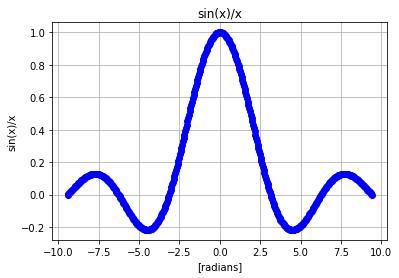

In [18]:

import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-3*np.pi,3*np.pi,400)  #400 points between -3pi and 3pi
y=np.sin(x)/x
plt.title('sin(x)/x')
plt.xlabel('[radians]')
plt.ylabel('sin(x)/x')
plt.grid()
plt.plot(x,y,'bo')
plt.show()

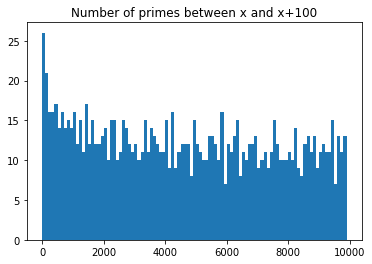

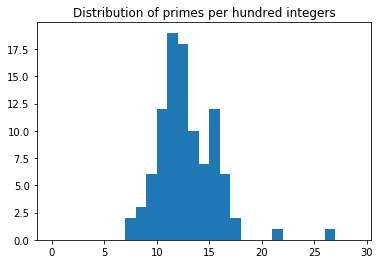

array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 2101,
       2201, 2301, 2401, 2501, 2601, 2701, 2801, 2901, 3001, 3101, 3201,
       3301, 3401, 3501, 3601, 3701, 3801, 3901, 4001, 4101, 4201, 4301,
       4401, 4501, 4601, 4701, 4801, 4901, 5001, 5101, 5201, 5301, 5401,
       5501, 5601, 5701, 5801, 5901, 6001, 6101, 6201, 6301, 6401, 6501,
       6601, 6701, 6801, 6901, 7001, 7101, 7201, 7301, 7401, 7501, 7601,
       7701, 7801, 7901, 8001, 8101, 8201, 8301, 8401, 8501, 8601, 8701,
       8801, 8901, 9001, 9101, 9201, 9301, 9401, 9501, 9601, 9701, 9801,
       9901])

In [21]:
hist=plt.hist(primes[0],bins=np.arange(1,10000,100))
plt.title('Number of primes between x and x+100')
plt.show()

plt.hist(hist[0],bins=np.arange(0,30))
plt.title("Distribution of primes per hundred integers")
plt.show()

hist[1]


# Code:  Documentation, comments etc.
The bottom line issue is clarity.  You can make code clear by using well thought out variable names.

Some comments make no sense.

Some documentation is unreadable (cf.  git help rebase)
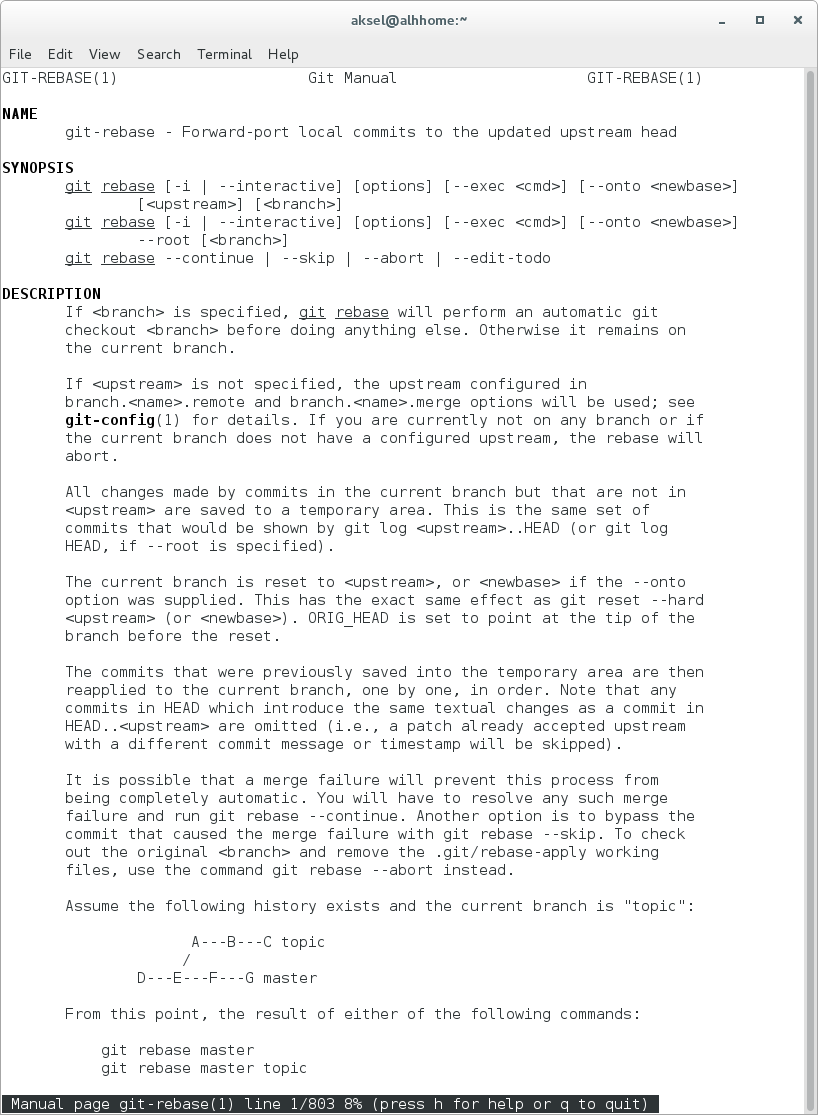


In [26]:
run pendulum.py

niter= 561


ImportError: cannot import name 'nrODE'